### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from scipy.spatial import distance
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
from scipy.cluster.hierarchy import fcluster

In [13]:
silhouette_df = pd.read_csv("vehicle.csv")
silhouette_df.sample(10)

compactness  circularity  distance_circularity  radius_ratio  \
734           88         40.0                  55.0         114.0   
433           85         42.0                  70.0         130.0   
332           99         57.0                 109.0         220.0   
610          103         56.0                 105.0         183.0   
778          111         50.0                 103.0         199.0   
823          105         54.0                 105.0         213.0   
660           88         35.0                  60.0         143.0   
719          104         53.0                 101.0         199.0   
463           85         40.0                  66.0         121.0   
263           89         35.0                  70.0         138.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
734                  53.0                        7          132.0   
433                  56.0                        7          150.0   
332                  66.0                       11          221.0   
610                  59.0                       10          210.0   
778                  60.0                       11          211.0   
823                  67.0                       10          200.0   
660                  59.0                        7          128.0   
719                  65.0                       11          213.0   
463                  52.0                        4          152.0   
263                  58.0                        7          126.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
734           53.0                    18.0                        139   
433           45.0                    19.0                        145   
332           30.0                    25.0                        176   
610           32.0                    24.0                        173   
778           31.0                    24.0                        156   
823           33.0                    23.0                        163   
660           52.0                    18.0                        129   
719           31.0                    24.0                        168   
463           44.0                    19.0                        133   
263           53.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
734            142.0              249.0                      158.0   
433            177.0              328.0                      172.0   
332            234.0              725.0                      236.0   
610            217.0              648.0                      218.0   
778            223.0              663.0                      188.0   
823            214.0              597.0                      214.0   
660            147.0              246.0                      109.0   
719            216.0              667.0                      221.0   
463            170.0              340.0                      163.0   
263            147.0              237.0                      112.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
734                         87.0             0.0               7.0   
433                         82.0            10.0              14.0   
332                         70.0            10.0              25.0   
610                         72.0            13.0              22.0   
778                         68.0             9.0               9.0   
823                         68.0            10.0              20.0   
660                         62.0             1.0               6.0   
719                         72.0            12.0              12.0   
463                         87.0            13.0               3.0   
263                         64.0             4.0              19.0   

     skewness_about.2  hollows_ratio class  
734             176.0            183   van  
433             181.0            185   bus  
332 

In [11]:
silhouette_df.shape

(846, 19)

In [4]:
silhouette_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [18]:
silhouette_df.dropna(inplace=True)

In [19]:
silhouette_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [20]:
silhouette_df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

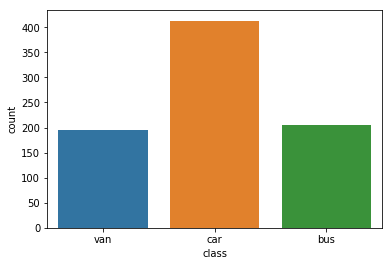

In [21]:
sns.countplot(x='class', data=silhouette_df)

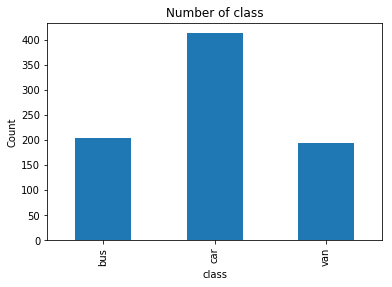

In [37]:
plt.figure()
pd.Series(silhouette_df['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of class');

### Check for any missing values in the data 

In [22]:
silhouette_df.isnull().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [26]:
silhouette_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

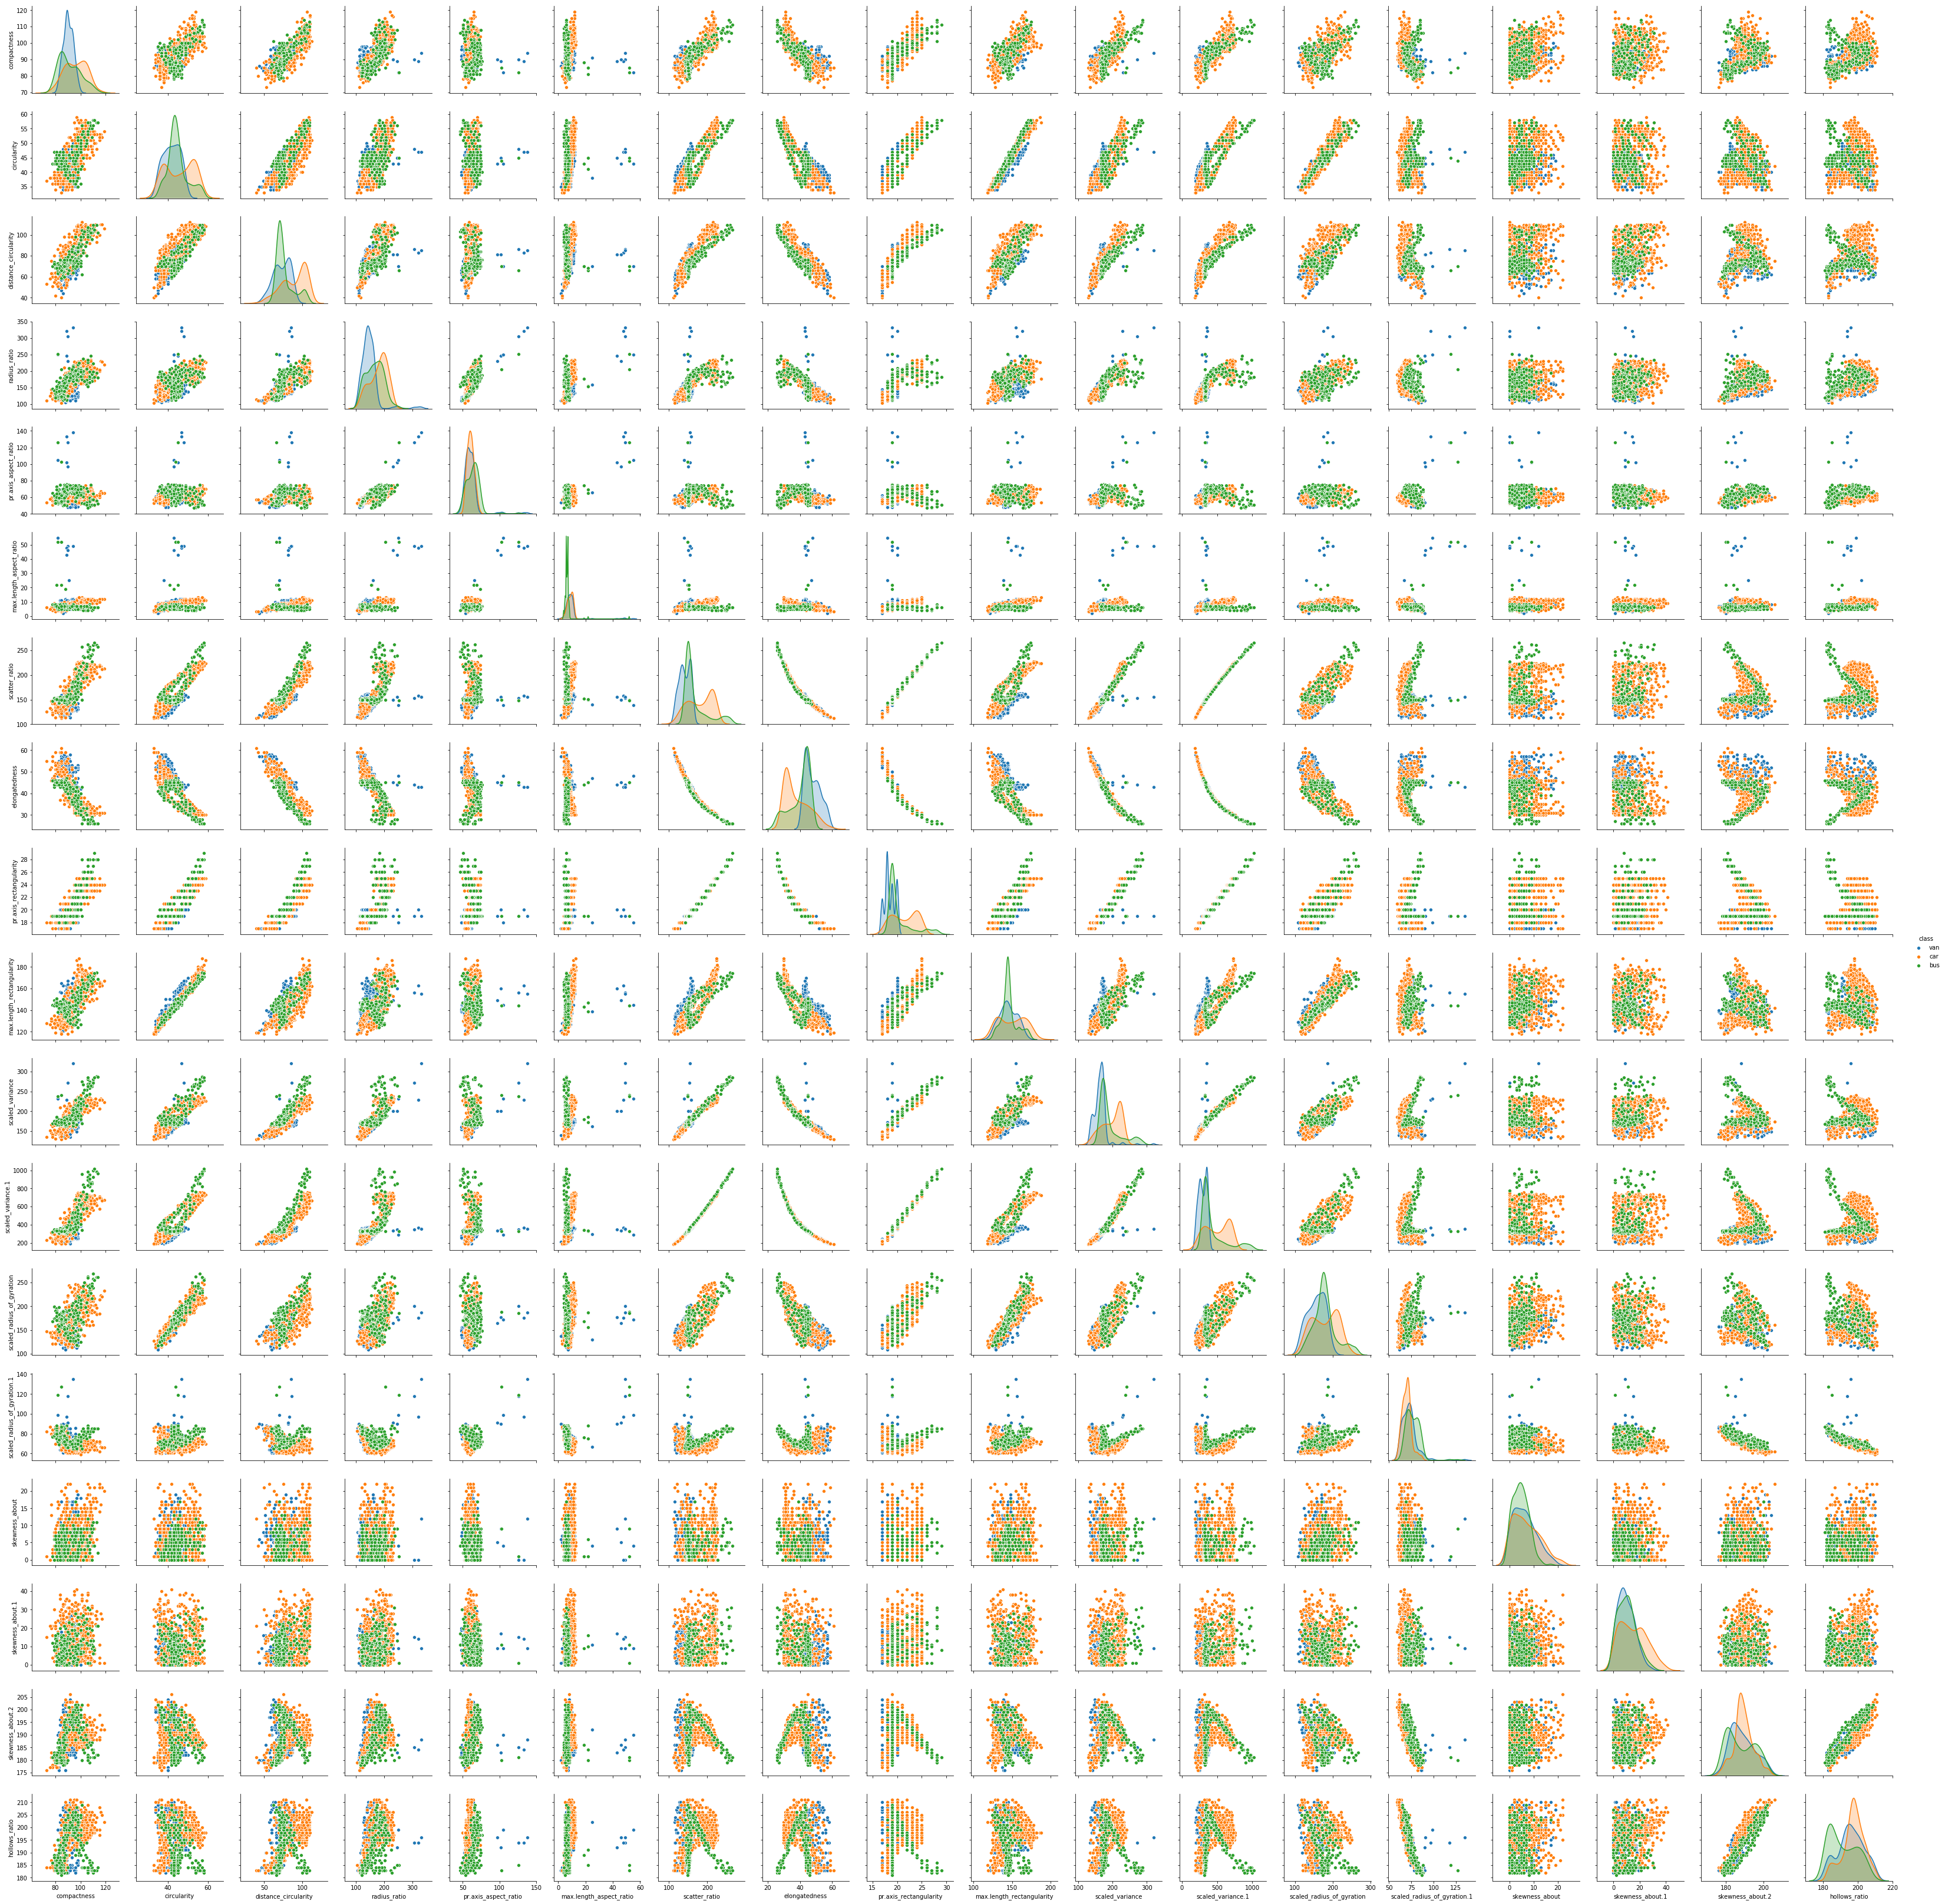

In [36]:
sns.pairplot(silhouette_df, diag_kind='kde' , hue = 'class')

### 3. Standardize the data 

In [31]:
silhouette_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [71]:
# Class feature is an object column , so it should not be standardized
silhouette_df_X = silhouette_df.drop('class',axis=1)

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [72]:
silhouette_df_z = silhouette_df_X.apply(zscore)

In [73]:
labelencoder=LabelEncoder()
#silhouette_df_z['class'] = labelencoder.fit_transform(silhouette_df['class'])

In [89]:
silhouette_df_z.sample(2)

compactness  circularity  distance_circularity  radius_ratio  \
505     2.593753     1.334359              1.138435      1.068668   
615    -0.687452    -1.758654             -0.826904     -0.508961   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
505              0.279250                 0.513657       1.555771   
615             -0.599253                -0.769959      -0.924430   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
505      -1.409094                1.727163                   1.249213   
615       0.899019               -0.994877                  -1.786165   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
505         1.304228           1.550660                   1.230116   
615        -0.975308          -0.881367                  -1.678995   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
505                    -0.187348        2.978219         -0.189159   
615                    -1.391943        0.538425          1.828448   

     skewness_about.2  hollows_ratio  
505          0.003400       0.442318  
615          2.442466       1.929965

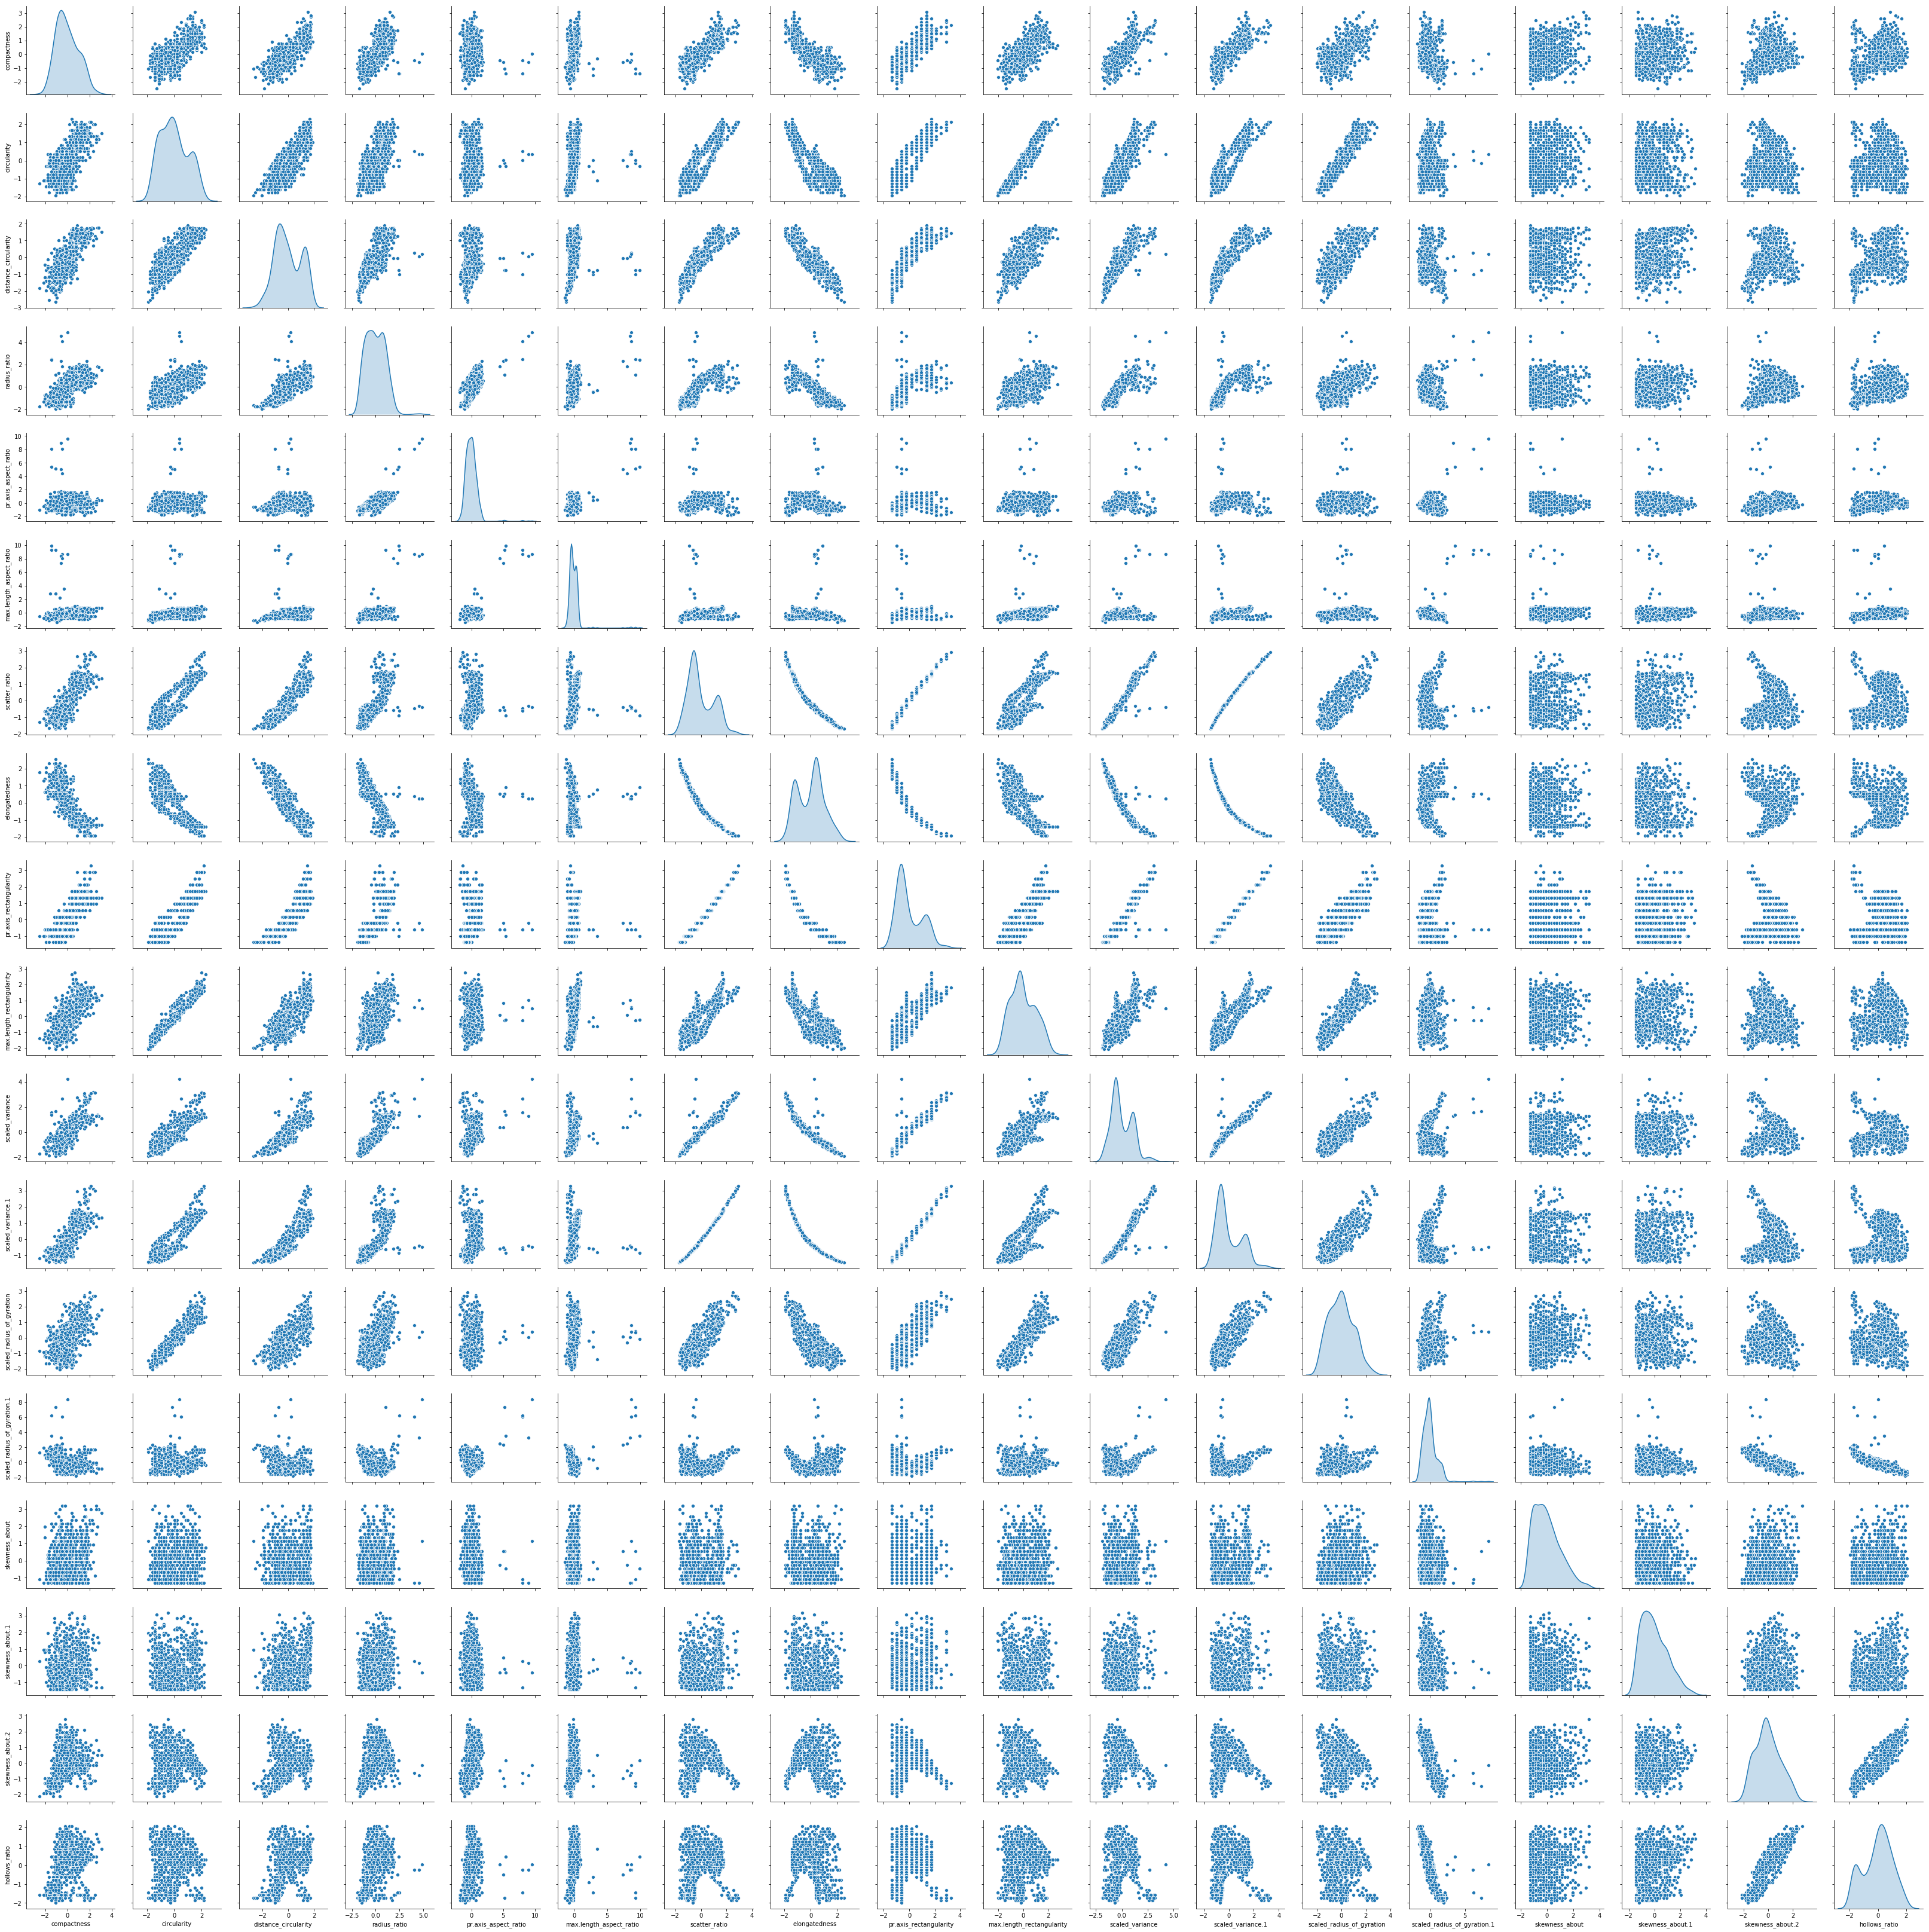

In [90]:
sns.pairplot(silhouette_df_z, diag_kind='kde')

### K - Means Clustering

### 4. Plotting Elbow/ Scree Plot

In [76]:
cluster_range = range(2,10)
cluster_errors = []
distortion = []
for cluster_n in cluster_range :
    clusters = KMeans(cluster_n, n_init = 5)
    clusters.fit(silhouette_df_z)
    labels = clusters.labels_
    cluster_errors.append(clusters.inertia_)
    distortion.append(sum(np.min(distance.cdist(silhouette_df_z, clusters.cluster_centers_, 'euclidean'), axis=1))/ silhouette_df_z.shape[0])
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0             2     8623.136976
1             3     7039.423465
2             4     5740.333282
3             5     5185.817276
4             6     4707.817362
5             7     4349.647156
6             8     4093.195114
7             9     3846.667305

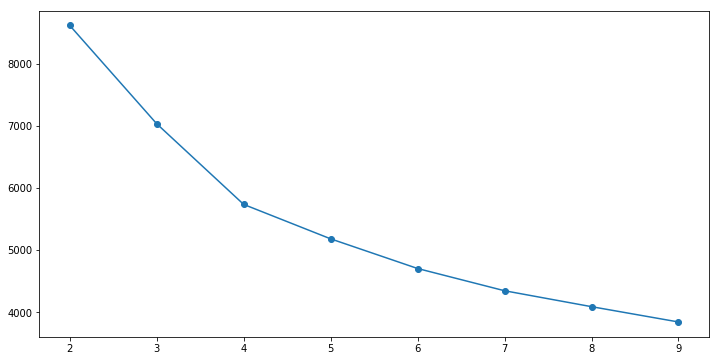

In [77]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

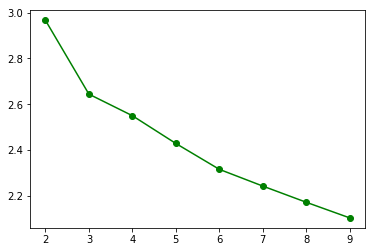

In [78]:
plt.plot(range(2,10), distortion, 'go-')

### Find out the optimal value of K

> ### Optimal value of k is 3 As per analysing pair plot and elbow plot (bend is maximum at 3) 

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [84]:
cluster = KMeans( n_clusters = 3, random_state = 100 )
cluster.fit(silhouette_df_z)
silhouette_df_z_copy = silhouette_df_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [92]:
centroids = cluster.cluster_centers_
centroids

array([[-0.91400071, -0.51327609, -0.88664922, -1.05602904, -0.49182906,
        -0.21883169, -0.775563  ,  0.85996991, -0.74203582, -0.47827281,
        -0.77910348, -0.78034412, -0.37943428,  0.82611912, -0.08658373,
        -0.30355495, -1.04650237, -1.10265258],
       [ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.2319252 , -0.57973847, -0.30724438, -0.02693437,  0.20516443,
        -0.11572895, -0.45873352,  0.32447256, -0.48810058, -0.54152679,
        -0.41282893, -0.46297248, -0.60799507, -0.62342017, -0.06824398,
         0.01513248,  0.82481456,  0.71018194]])

### 5. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [93]:
centroid_df = pd.DataFrame(centroids, columns = list(silhouette_df_z) )
centroid_df

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.914001    -0.513276             -0.886649     -1.056029   
1     1.130765     1.170942              1.195006      1.019095   
2    -0.231925    -0.579738             -0.307244     -0.026934   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0             -0.491829                -0.218832      -0.775563   
1              0.215052                 0.342508       1.271805   
2              0.205164                -0.115729      -0.458734   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.859970               -0.742036                  -0.478273   
1      -1.190612                1.275484                   1.092668   
2       0.324473               -0.488101                  -0.541527   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.779103          -0.780344                  -0.379434   
1         1.220381           1.281327                   1.079542   
2        -0.412829          -0.462972                  -0.607995   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     0.826119       -0.086584         -0.303555   
1                    -0.028795        0.162290          0.265665   
2                    -0.623420       -0.068244          0.015132   

   skewness_about.2  hollows_ratio  
0         -1.046502      -1.102653  
1         -0.005356       0.183801  
2          0.824815       0.710182

In [95]:
prediction=cluster.predict(silhouette_df_z)
silhouette_df_z["PREDICTED_CLASS"] = prediction

In [96]:
silhouette_df_z.sample(5)

compactness  circularity  distance_circularity  radius_ratio  \
469    -0.201348    -0.781913             -1.270690     -0.747094   
785    -1.052030    -0.293543             -1.017098     -1.372192   
428     2.229174     0.845988              1.392027      0.830535   
412    -1.659661    -0.293543             -0.700108     -1.074526   
661     1.986122     0.194828              1.138435      0.830535   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
469             -0.348252                -0.128151      -1.257140   
785             -0.724754                -0.556023      -0.621966   
428             -0.473753                 0.513657       1.192815   
412             -0.222752                -0.342087      -0.561474   
661             -0.097251                 0.085785       0.739120   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
469       1.411933               -1.383740                  -0.613406   
785       0.642562               -0.606014                  -0.199490   
428      -1.152637                1.338300                   0.766312   
412       0.514333               -0.606014                  -0.130505   
661      -0.896180                0.560575                   0.076453   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
469        -1.264263          -1.126854                  -0.750556   
785        -0.718459          -0.681553                  -0.100648   
428         1.111591           1.145322                   0.363572   
412        -0.590034          -0.618754                   0.054092   
661         0.662105           0.700021                  -0.441076   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
469                    -1.391943        1.351690         -1.310052   
785                     1.686465       -0.071523         -0.189159   
428                    -0.722724        1.758322          1.043823   
412                     1.151090       -0.071523          0.259198   
661                    -0.990411        0.945058         -0.637516   

     skewness_about.2  hollows_ratio  PREDICTED_CLASS  
469          2.442466       1.929965                2  
785         -1.622644      -1.856772                0  
428          0.328609       0.848040                1  
412         -1.460039      -1.586291                0  
661          0.816422       0.983281                1

### Use kmeans.labels_ function to print out the labels of the classes

In [98]:
cluster.labels_
# can also use silhouette_df_z['PREDICTED_CLASS']

array([2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 1,
       2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1,
       2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1,
       0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 1, 1,
       2, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 0, 2,
       1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0,
       2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0,
       2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0,

## Hierarchical Clustering 

### 6. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [139]:
np.random.seed(101)
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [140]:
print(a[:5])
print(b[:5])
print(c[:5])

[[13.88278486  4.43850083]
 [11.68725556  1.25098137]
 [10.31639671  1.44934627]
 [ 9.83741213 -2.04197417]
 [ 8.69160067 -4.28977303]]
[[ 1.07940833 18.62677479]
 [ 2.89254028 22.63834757]
 [ 0.39368817 20.14487383]
 [ 0.39803686 17.81906475]
 [ 0.31379022 22.08683562]]
[[ 8.81694043 17.14148983]
 [11.5710108  21.57381989]
 [12.81121847 20.58805306]
 [12.14029784 17.72264857]
 [ 8.73857733 18.61130649]]


In [142]:
print(a.shape)
print(b.shape)
print(c.shape)

(100, 2)
(50, 2)
(100, 2)


### 7. Combine all three arrays a,b,c into a dataframe

In [141]:
hier_clustering_data = np.concatenate((a,b,c),axis=0)
hier_clustering_data[:5]

array([[13.88278486,  4.43850083],
       [11.68725556,  1.25098137],
       [10.31639671,  1.44934627],
       [ 9.83741213, -2.04197417],
       [ 8.69160067, -4.28977303]])

In [143]:
hier_clustering_df = pd.DataFrame(  hier_clustering_data,columns=["A","B"] )
hier_clustering_df.head()

A         B
0  13.882785  4.438501
1  11.687256  1.250981
2  10.316397  1.449346
3   9.837412 -2.041974
4   8.691601 -4.289773

In [144]:
hier_clustering_df.shape

(250, 2)

### 8. Use scatter matrix to print all the 3 distributions

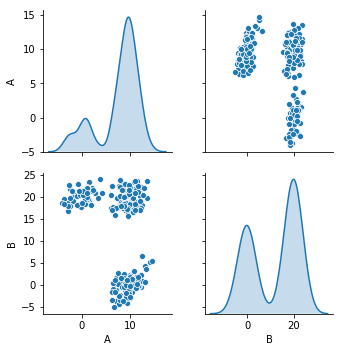

In [137]:
sns.pairplot(hier_clustering_df, diag_kind='kde')

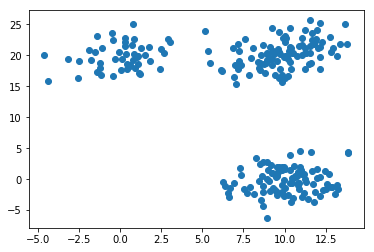

In [148]:
plt.scatter(x=hier_clustering_df['A'],y=hier_clustering_df['B'])

### 9. Find out the linkage matrix

Use ward as linkage metric and distance as Eucledian

In [162]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

link_z = linkage(hier_clustering_df,'ward')
c, coph_dists = cophenet(link_z , pdist(hier_clustering_df))

c

0.9536963071171022

### 10. Plot the dendrogram for the consolidated dataframe

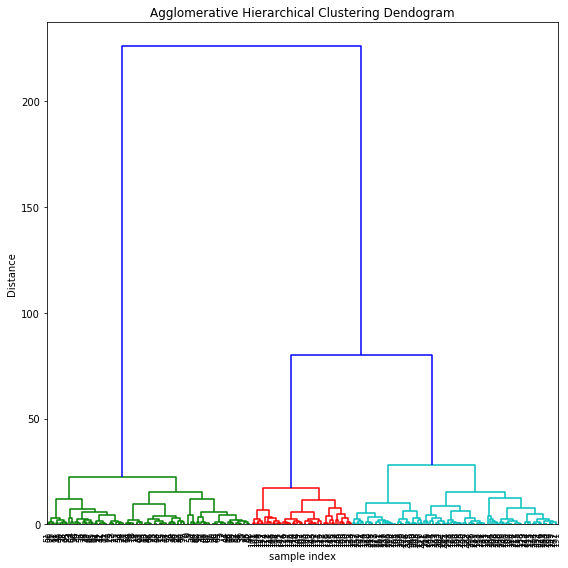

In [167]:
plt.figure(figsize=(8, 8))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(link_z, leaf_rotation=90.,color_threshold = 50, leaf_font_size=8. )
plt.tight_layout()

### 11. Recreate the dendrogram for last 3 merged clusters 

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

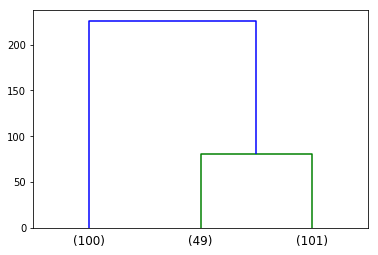

In [230]:
dendrogram(
    link_z,
    color_threshold=81,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

### 12. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [206]:
# From the truncated dendrogram the optimal distance between clusters is 80

### 13. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [210]:
labels = fcluster(link_z,t=80,criterion='distance')
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

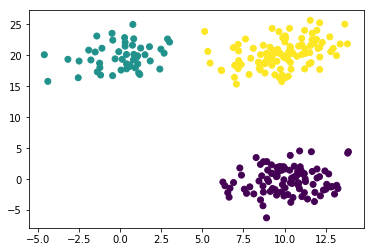

In [211]:
plt.scatter(x=hier_clustering_df['A'],y=hier_clustering_df['B'],c=labels)